민정님이 만드신 예측 모델에 추가해서 진행했습니다 
맨마지막에 최종 모델 만들어뒀어요
그거 보고 각자 맡은 지역별 데이터 준비해와주세요 !!
만나서 같이 모델 돌려보십당 

#메인 데이터 불러오기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

main_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/서울시 개별사고정보(2010_2018).csv', sep=',', encoding='cp949')
main_data.head(10)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,20100101,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,20100101,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,20100101,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,20100101,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상
4,20100101,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상
5,20100101,00시,금,서초구,중상,내곡동,0,1,0,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,건조,맑음,단일로,터널안,승용차,남,58세,상해없음,승용차,여,32세,중상
6,20100101,00시,금,양천구,중상,신월동,0,1,0,0,차대차,측면충돌,측면충돌,교차로 통행방법 위반,포장,건조,맑음,교차로,교차로내,승용차,남,26세,상해없음,이륜차,남,20세,중상
7,20100101,00시,금,도봉구,경상,쌍문동,0,0,1,0,차대차,측면충돌,측면충돌,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,30세,상해없음,원동기장치자전거,남,17세,경상
8,20100101,00시,금,은평구,사망,갈현동,1,0,0,0,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,화물차,남,30세,상해없음,보행자,남,27세,사망
9,20100101,01시,금,종로구,경상,세종로,0,0,1,0,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,34세,상해없음,승용차,남,29세,경상


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#시간별/지역별 변수 추가하기

In [ ]:
main_data['발생일']=[str(i) for i in main_data['발생일']]
main_data['발생일_시간'] = main_data['발생일']+" "+main_data['발생시간']
main_data['발생일_시간_시군구'] = main_data['발생일']+" "+main_data['발생시간']+" "+main_data['발생지_시군구']
main_data['사고건수'] = [1 for i in main_data['발생일']]
main_data['발생일'] = pd.to_datetime(main_data['발생일'], format='%Y-%m-%d')
main_data['발생년도'] = main_data['발생일'].dt.year
main_data['발생월'] = main_data['발생일'].dt.month
main_data['발생일자'] = main_data['발생일'].dt.day

main_data['부상자수'] = main_data['사망자수']+main_data['중상자수']+main_data['경상자수']+main_data['부상신고자수']


main_data.head(10)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2010-01-01,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1,1
1,2010-01-01,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1,4
2,2010-01-01,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1,2
3,2010-01-01,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1,1
4,2010-01-01,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1,2
5,2010-01-01,00시,금,서초구,중상,내곡동,0,1,0,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,건조,맑음,단일로,터널안,승용차,남,58세,상해없음,승용차,여,32세,중상,20100101 00시,20100101 00시 서초구,1,2010,1,1,1
6,2010-01-01,00시,금,양천구,중상,신월동,0,1,0,0,차대차,측면충돌,측면충돌,교차로 통행방법 위반,포장,건조,맑음,교차로,교차로내,승용차,남,26세,상해없음,이륜차,남,20세,중상,20100101 00시,20100101 00시 양천구,1,2010,1,1,1
7,2010-01-01,00시,금,도봉구,경상,쌍문동,0,0,1,0,차대차,측면충돌,측면충돌,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,30세,상해없음,원동기장치자전거,남,17세,경상,20100101 00시,20100101 00시 도봉구,1,2010,1,1,1
8,2010-01-01,00시,금,은평구,사망,갈현동,1,0,0,0,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,화물차,남,30세,상해없음,보행자,남,27세,사망,20100101 00시,20100101 00시 은평구,1,2010,1,1,1
9,2010-01-01,01시,금,종로구,경상,세종로,0,0,1,0,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,34세,상해없음,승용차,남,29세,경상,20100101 01시,20100101 01시 종로구,1,2010,1,1,1


메인 데이터의 columns 확인

In [ ]:
main_data.columns

Index(['발생일', '발생시간', '요일', '발생지_시군구', '사고내용', '법정동명', '사망자수', '중상자수', '경상자수',
       '부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태',
       '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도',
       '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도', '발생일_시간', '발생일_시간_시군구', '사고건수',
       '발생년도', '발생월', '발생일자', '부상자수'],
      dtype='object')

#발생일_시간_시군구별 데이터 grouping

In [ ]:
new_data1 = main_data.groupby(['발생일_시간', '요일', '발생년도','발생월','발생일자']).sum()[['사망자수', '중상자수', '부상신고자수', '사고건수', '부상자수', '경상자수']]
new_data1 = new_data1.reset_index(drop=False) 
new_data1 = new_data1.reindex(columns = ['발생일_시간','사고건수', '발생년도', '발생월', '발생일자', '요일','부상자수','사망자수', '중상자수', '경상자수','부상신고자수'])
new_data1.head()

,발생일_시간,사고건수,발생년도,발생월,발생일자,요일,부상자수,사망자수,중상자수,경상자수,부상신고자수
0,20100101 00시,9,2010,1,1,0,14,1,3,10,0
1,20100101 01시,11,2010,1,1,0,32,0,5,23,4
2,20100101 02시,8,2010,1,1,0,15,0,2,11,2
3,20100101 03시,10,2010,1,1,0,29,0,13,16,0
4,20100101 04시,6,2010,1,1,0,13,1,1,11,0


요일/발생년도/발생월/발생일자는 sum할 수 없으므로 따로 조정

##모델 학습

회귀 모델 중 랜덤포레스트 / 선형 회귀 / 선형_로그 회귀 모델 사용 --> 편의를 위해 함수로 정의

In [ ]:
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt
  import numpy as np

  def data_split(data, feature_names):

    X_train = data[(data['발생년도']<2018)][feature_names]
    X_test = data[(data['발생년도']==2018)][feature_names]
    y_train = data[(data['발생년도']<2018)]['사고건수']
    y_test = data[(data['발생년도']==2018)]['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test


  def forest_fit():

    forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


  def LR_fit():

    LR = LinearRegression()

    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))    

  
  def LR_log_fit():
    LR = LinearRegression()

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)
    LR.fit(X_train, y_train_log)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(np.exp(y_train_log),np.exp(y_train_pred)),
      mean_squared_error(np.exp(y_test_log),np.exp(y_test_pred))))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(np.exp(y_train_log),np.exp(y_train_pred)),
          r2_score(np.exp(y_test_log),np.exp(y_test_pred))))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(np.exp(y_test_pred)[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


#발생일_시군구별 데이터 grouping

문자형 데이터 정수형 변환

In [ ]:
#연령 데이터
def age_to_num(df):
    for c, i in enumerate(df):
        if i == '불명':
            df[c] = '0세'
    df = [int(i[:-1]) for i in df]
    return df

In [ ]:
main_data['가해자연령'] = age_to_num(main_data['가해자연령']) 
main_data['피해자연령'] = age_to_num(main_data['피해자연령'])

#시간 데이터
main_data['발생시간'] = age_to_num(main_data['발생시간']) 

In [ ]:
main_data.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2010-01-01,0,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54,상해없음,이륜차,남,19,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1,1
1,2010-01-01,0,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57,상해없음,승용차,남,39,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1,4
2,2010-01-01,0,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51,경상,승용차,남,58,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1,2
3,2010-01-01,0,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56,상해없음,승용차,남,55,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1,1
4,2010-01-01,0,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33,상해없음,승용차,남,55,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1,2


결측치 확인

In [ ]:
main_data.isna().sum()

발생일           0
발생시간          0
요일            0
발생지_시군구       0
사고내용          0
법정동명          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
노면상태_대분류      0
노면상태          0
기상상태          0
도로형태_대분류      0
도로형태          0
가해자차종         0
가해성별          0
가해자연령         0
가해자신체상해정도     0
피해자차종         0
피해자성별         0
피해자연령         0
피해자신체상해정도     0
발생일_시간        0
발생일_시간_시군구    0
사고건수          0
발생년도          0
발생월           0
발생일자          0
부상자수          0
dtype: int64

결측치 대체

In [ ]:
main_data = main_data.fillna('결측치')

범주형 데이터 정수형으로 전환

In [ ]:
new_data2 = main_data[:]

In [ ]:
for i in ['요일', '발생지_시군구', '사고내용', '법정동명', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자신체상해정도']:
  mapping = {label: idx for idx, label in enumerate(np.unique(main_data[i]))}
  print(mapping)
  new_data2[i] = main_data[i].map(mapping)

{'금': 0, '목': 1, '수': 2, '월': 3, '일': 4, '토': 5, '화': 6}
{'강남구': 0, '강동구': 1, '강북구': 2, '강서구': 3, '관악구': 4, '광진구': 5, '구로구': 6, '금천구': 7, '노원구': 8, '도봉구': 9, '동대문구': 10, '동작구': 11, '마포구': 12, '서대문구': 13, '서초구': 14, '성동구': 15, '성북구': 16, '송파구': 17, '양천구': 18, '영등포구': 19, '용산구': 20, '은평구': 21, '종로구': 22, '중구': 23, '중랑구': 24}
{'경상': 0, '부상신고': 1, '사망': 2, '중상': 3}
{'가락동': 0, '가리봉동': 1, '가산동': 2, '가양동': 3, '가회동': 4, '갈월동': 5, '갈현동': 6, '강일동': 7, '개봉동': 8, '개포동': 9, '개화동': 10, '거여동': 11, '견지동': 12, '결측치': 13, '경운동': 14, '계동': 15, '고덕동': 16, '고척동': 17, '공덕동': 18, '공릉동': 19, '공평동': 20, '공항동': 21, '과해동': 22, '관수동': 23, '관철동': 24, '관훈동': 25, '광장동': 26, '광희동1가': 27, '광희동2가': 28, '교남동': 29, '교북동': 30, '구기동': 31, '구로동': 32, '구산동': 33, '구수동': 34, '구의동': 35, '군자동': 36, '궁동': 37, '궁정동': 38, '권농동': 39, '금호동1가': 40, '금호동2가': 41, '금호동3가': 42, '금호동4가': 43, '길동': 44, '길음동': 45, '낙원동': 46, '남가좌동': 47, '남대문로1가': 48, '남대문로2가': 49, '남대문로3가': 50, '남대문로4가': 51, '남대문로5가': 52, '남산동1가': 53, '남산동2가': 54, '남산동3가': 5

In [ ]:
new_data2.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2010-01-01,0,0,12,0,204,0,0,1,0,1,1,1,3,1,4,2,3,7,6,1,54,4,12,1,19,0,20100101 00시,20100101 00시 마포구,1,2010,1,1,1
1,2010-01-01,0,0,11,3,85,0,1,3,0,1,11,12,6,1,2,2,3,7,7,1,57,4,7,1,39,6,20100101 00시,20100101 00시 동작구,1,2010,1,1,4
2,2010-01-01,0,0,4,0,242,0,0,2,0,1,11,12,3,1,2,5,3,7,6,1,51,0,7,1,58,0,20100101 00시,20100101 00시 관악구,1,2010,1,1,2
3,2010-01-01,0,0,3,0,453,0,0,1,0,1,1,1,6,1,0,2,0,3,6,1,56,4,7,1,55,0,20100101 00시,20100101 00시 강서구,1,2010,1,1,1
4,2010-01-01,0,0,6,0,32,0,0,2,0,1,8,9,5,1,0,2,0,2,6,1,33,4,7,1,55,0,20100101 00시,20100101 00시 구로구,1,2010,1,1,2


발생일_시간_시군구 별 평균값

In [ ]:
main_data.groupby(['발생일_시간_시군구']).mean().head()

#최빈값도 받아오고 싶었는데, 구글링한 방법으로는 자꾸 에러가 뜨네욤..코딩 천재들 Help me..

,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생년도,발생월,발생일자,부상자수
발생일_시간_시군구,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20100101 00시 강서구,0.0,0.0,3.0,0.0,453.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,6.0,1.0,0.0,2.0,0.0,3.0,6.0,1.0,56.0,4.0,7.0,1.0,55.0,0.0,1.0,2010.0,1.0,1.0,1.0
20100101 00시 관악구,0.0,0.0,4.0,0.0,242.0,0.0,0.0,2.0,0.0,1.0,11.0,12.0,3.0,1.0,2.0,5.0,3.0,7.0,6.0,1.0,51.0,0.0,7.0,1.0,58.0,0.0,1.0,2010.0,1.0,1.0,2.0
20100101 00시 구로구,0.0,0.0,6.0,0.0,32.0,0.0,0.0,2.0,0.0,1.0,8.0,9.0,5.0,1.0,0.0,2.0,0.0,2.0,6.0,1.0,33.0,4.0,7.0,1.0,55.0,0.0,1.0,2010.0,1.0,1.0,2.0
20100101 00시 도봉구,0.0,0.0,9.0,0.0,256.0,0.0,0.0,1.0,0.0,1.0,12.0,15.0,6.0,1.0,0.0,2.0,0.0,3.0,6.0,1.0,30.0,4.0,11.0,1.0,17.0,0.0,1.0,2010.0,1.0,1.0,1.0
20100101 00시 동작구,0.0,0.0,11.0,3.0,85.0,0.0,1.0,3.0,0.0,1.0,11.0,12.0,6.0,1.0,2.0,2.0,3.0,7.0,7.0,1.0,57.0,4.0,7.0,1.0,39.0,6.0,1.0,2010.0,1.0,1.0,4.0


In [ ]:
def mode(a):
  u, c = np.unique(a, return_counts=True)
  return u[c.argmax()]


pd.DataFrame(main_data.groupby(['발생지_시군구'])['법정동명'].apply(mode))
#민정님 이렇게 변수 하나씩만 최빈값 최선인거 같아유 ...
#전체 데이터 최빈값 받아오고 싶으면 for문 돌려서 수작업으로 .. ^^ 해야할 거 같슴다 ... 쥬륵 .. 

,법정동명
발생지_시군구,
0,276
1,397
2,152
3,453
4,242
5,354
6,32
7,98
8,194


# 모델 학습

In [ ]:
main_data.head(5)

,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2010-01-01,0,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54,상해없음,이륜차,남,19,경상,20100101 00시,20100101 00시 마포구,1,2010,1,1,1
1,2010-01-01,0,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57,상해없음,승용차,남,39,중상,20100101 00시,20100101 00시 동작구,1,2010,1,1,4
2,2010-01-01,0,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51,경상,승용차,남,58,경상,20100101 00시,20100101 00시 관악구,1,2010,1,1,2
3,2010-01-01,0,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56,상해없음,승용차,남,55,경상,20100101 00시,20100101 00시 강서구,1,2010,1,1,1
4,2010-01-01,0,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33,상해없음,승용차,남,55,경상,20100101 00시,20100101 00시 구로구,1,2010,1,1,2


In [ ]:
feature_names = ['발생시간','요일', '발생년도', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '도로형태_대분류']
#사고내용, 부상자수, 사고유형, 가해자/피해자 신상은 사고 이후에 얻을 수 있는 정보니까 빼고 해야지 맞지 않을까요
#cctv로 운전자들의 신상을 얻을 순 있긴 하지만 이 데이터는 쉽게 얻을 수 있는게 아니니까
#시간정보, 기상, 노면, 도로형태를 사용하는 것이 맞는 것 같습니당
#그리고 개인적인 생각인데 지역별 사고건수를 예측하는 모델이니까 각 구별 가로등, 유동인구, 거주인구 등 이런 데이터를 추가해야하지 않을까유
#10000000000% 개인적인 생각입니다 .. ㅎ

평균값 데이터

In [ ]:
mean_data = new_data2.groupby(['발생지_시군구','발생년도']).mean()
mean_data['사고건수'] = new_data2.groupby(['발생지_시군구','발생년도'])['사고건수'].sum() #사고건수만 sum
mean_data = mean_data.reset_index(drop=False)
mean_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2010,11.884540,2.876373,1.057167,190.744016,0.008730,0.393129,1.008448,0.056041,0.810194,9.392002,10.985919,5.988736,0.998029,0.558434,2.157420,1.917206,5.824838,6.438750,1.101662,41.575049,3.689665,7.394537,1.425514,39.331456,2.117995,3551,6.452267,15.687130,1.466348
1,0,2011,11.962942,2.882650,0.966873,194.393318,0.010107,0.345031,1.028355,0.081976,0.797586,8.107805,9.422796,6.137002,0.997473,0.547726,2.119034,1.983436,5.882369,6.441325,1.113139,42.434868,3.726277,7.266143,1.464346,39.750421,2.010668,3562,7.003369,16.177148,1.465469
2,0,2012,11.888368,2.868332,1.002602,190.822014,0.006505,0.367942,1.008067,0.098361,0.798074,6.956024,8.036950,6.110591,0.998179,0.522769,2.108509,2.027583,5.839969,6.447567,1.100703,42.590684,3.659381,7.303149,1.443924,40.517564,2.061410,3843,6.586781,15.983086,1.480874
3,0,2013,12.330748,2.912188,0.986981,190.374515,0.008587,0.350139,0.998338,0.126870,0.795568,6.646537,7.643213,6.131579,0.998892,0.515512,2.165928,1.942105,5.625208,6.484211,1.118006,42.862327,3.668698,7.271191,1.445706,41.032964,2.075069,3610,6.605540,15.860111,1.483934
4,0,2014,12.555188,2.877208,0.975166,189.692053,0.004691,0.333609,0.956678,0.163631,0.788355,6.695364,7.741170,6.119481,0.998068,0.363687,2.112859,1.931015,5.578642,6.551876,1.111203,43.404249,3.534768,7.273455,1.526490,40.990342,2.175773,3624,6.686810,15.951159,1.458609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,24,2014,13.517879,3.017263,1.193588,179.528977,0.006782,0.388409,0.770654,0.184957,0.770037,6.979038,8.174476,5.857583,0.999383,0.350185,2.131936,1.662762,5.240444,7.300247,1.117139,44.819975,3.470407,7.786683,1.505549,42.270037,2.678175,1622,6.889026,15.799630,1.350801
221,24,2015,13.411150,3.027875,1.082462,186.852497,0.009292,0.335656,0.793844,0.188153,0.747967,8.448897,9.960511,5.809524,0.999419,0.338560,2.111498,1.586527,5.080720,7.466899,1.098722,44.809524,3.410569,7.785714,1.541812,42.206156,2.483159,1722,6.774100,16.105691,1.326945
222,24,2016,13.318567,3.011075,0.907492,190.574593,0.005863,0.286645,0.887296,0.148534,0.749186,8.366775,10.018241,5.829967,0.999349,0.291205,2.092508,1.793485,5.371987,7.295114,1.112704,46.505537,3.373941,7.823453,1.489902,44.119870,2.142020,1535,6.661889,16.027362,1.328339
223,24,2017,13.460037,3.010372,1.021354,182.586333,0.003661,0.328859,0.859671,0.170836,0.766931,7.522270,9.132398,5.619890,1.000000,0.243441,2.095180,1.545455,4.862111,7.222087,1.124466,45.807810,3.431971,7.827944,1.549725,44.166565,2.369738,1639,6.616229,15.719341,1.363026


훈련 MSE: 36920.588, 테스트 MSE: 242636.831
훈련 R^2: 0.893, 테스트 R^2: 0.362


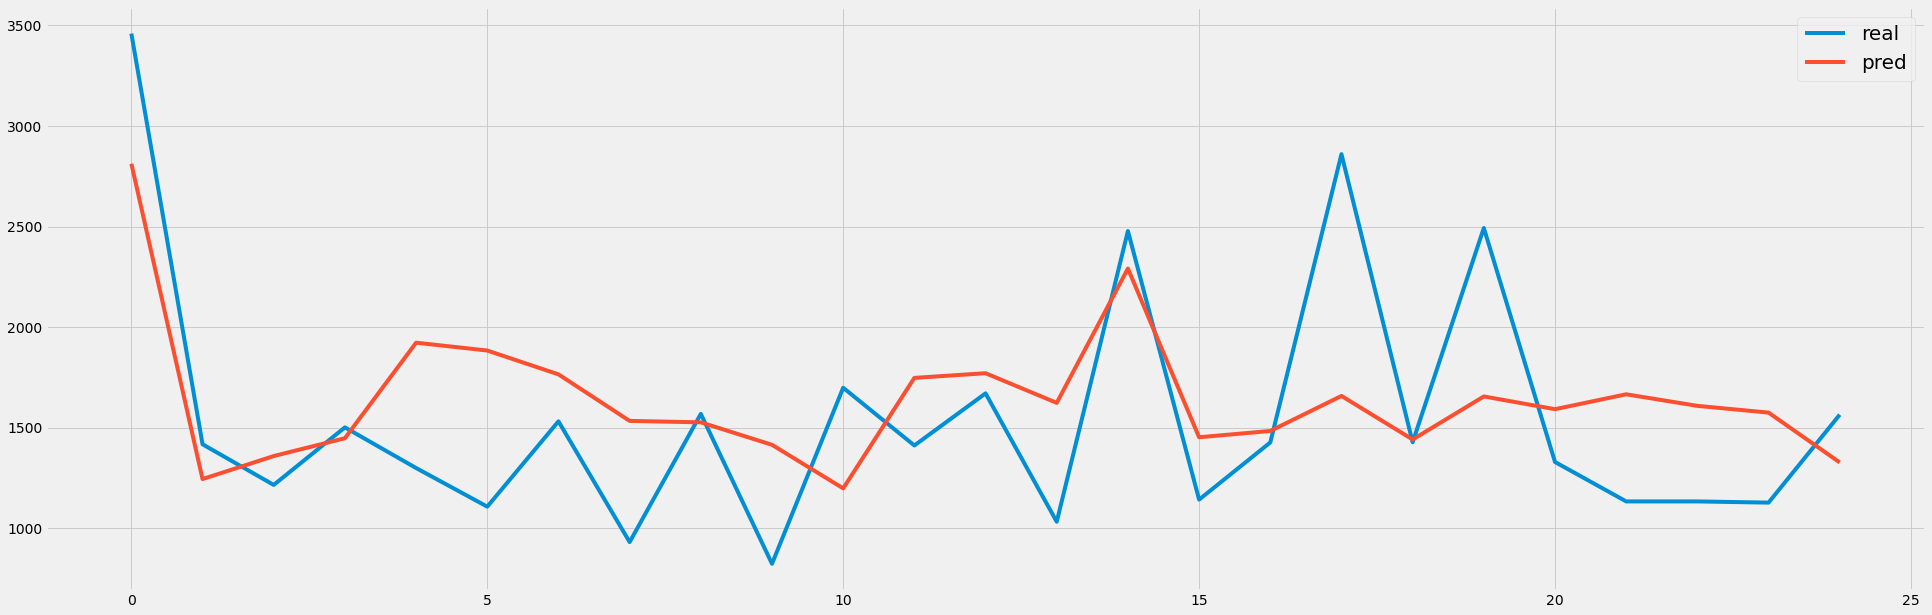

CV 정확도 점수: [-0.38024612 -3.17185238 -4.62618492 -3.91335958 -0.44732714  0.02844464
 -0.39219371 -0.80192479 -7.88202651 -2.46574995]
CV 정확도: -2.405 +/- 2.414


In [ ]:
X_train, X_test, y_train, y_test = data_split(mean_data, feature_names)
forest_fit()

합 데이터

In [ ]:
sum_data = new_data2.groupby(['발생지_시군구','발생년도']).sum()
sum_data = sum_data.reset_index(drop=False)
sum_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2010,42202,10214,3754,677332,31,1396,3581,199,2877,33351,39011,21266,3544,1983,7661,6808,20684,22864,3912,147633,13102,26258,5062,139666,7521,3551,22912,55705,5207
1,0,2011,42612,10268,3444,692429,36,1229,3663,292,2841,28880,33564,21860,3553,1951,7548,7065,20953,22944,3965,151153,13273,25882,5216,141591,7162,3562,24946,57623,5220
2,0,2012,45687,11023,3853,733329,25,1414,3874,378,3067,26732,30886,23483,3836,2009,8103,7792,22443,24778,4230,163676,14063,28066,5549,155709,7922,3843,25313,61423,5691
3,0,2013,44514,10513,3563,687252,31,1264,3604,458,2872,23994,27592,22135,3606,1861,7819,7011,20307,23408,4036,154733,13244,26249,5219,148129,7491,3610,23846,57255,5357
4,0,2014,45500,10427,3534,687444,17,1209,3467,593,2857,24264,28054,22177,3617,1318,7657,6998,20217,23744,4027,157297,12810,26359,5532,148549,7885,3624,24233,57807,5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,24,2014,21926,4894,1936,291196,11,630,1250,300,1249,11320,13259,9501,1621,568,3458,2697,8500,11841,1812,72698,5629,12630,2442,68562,4344,1622,11174,25627,2191
221,24,2015,23094,5214,1864,321760,16,578,1367,324,1288,14549,17152,10004,1721,583,3636,2732,8749,12858,1892,77162,5873,13407,2655,72679,4276,1722,11665,27734,2285
222,24,2016,20444,4622,1393,292532,9,440,1362,228,1150,12843,15378,8949,1534,447,3212,2753,8246,11198,1708,71386,5179,12009,2287,67724,3288,1535,10226,24602,2039
223,24,2017,22061,4934,1674,299259,6,539,1409,280,1257,12329,14968,9211,1639,399,3434,2533,7969,11837,1843,75079,5625,12830,2540,72389,3884,1639,10844,25764,2234


훈련 MSE: 76.745, 테스트 MSE: 491.032
훈련 R^2: 1.000, 테스트 R^2: 0.999


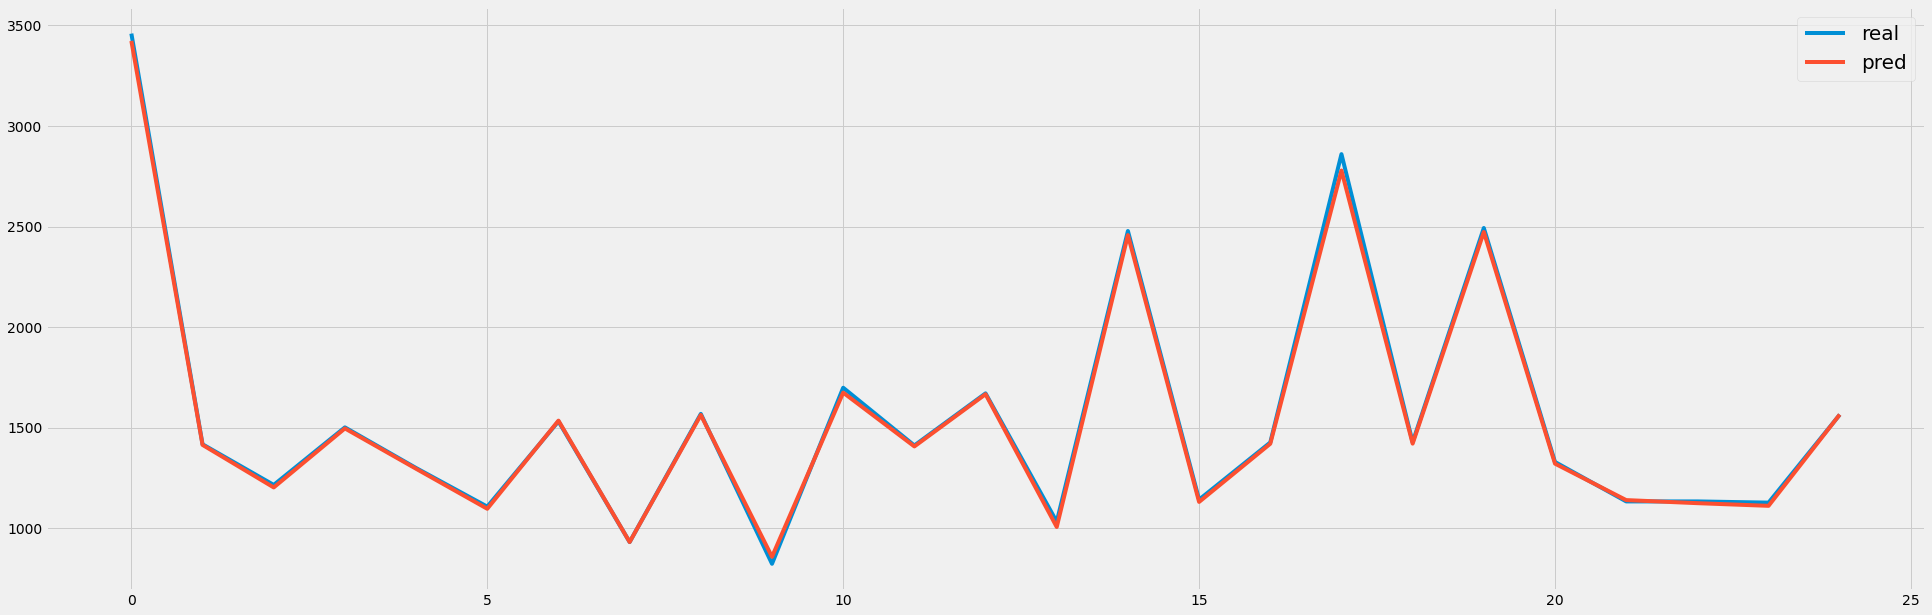

CV 정확도 점수: [0.74884525 0.99802555 0.99888572 0.96598734 0.99769085 0.99944745
 0.9948119  0.99202113 0.99415855 0.9980462 ]
CV 정확도: 0.969 +/- 0.074


In [ ]:
X_train, X_test, y_train, y_test = data_split(sum_data, feature_names)
forest_fit()

요일, 발생년도, 발생월, 발생일자, 발생시간, 발생지 시군구

In [ ]:
col = ['사고내용', '법정동명', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수','부상자수']
group_data = new_data2.groupby(['요일', '발생년도','발생월','발생일자','발생시간','발생지_시군구']).sum()[col]
group_data = group_data.reset_index(drop=False)
group_data

,요일,발생년도,발생월,발생일자,발생시간,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,부상자수
0,0,2010,1,1,0,3,0,453,0,0,1,0,1,1,1,6,1,0,2,0,3,6,1,56,4,7,1,55,0,1,1
1,0,2010,1,1,0,4,0,242,0,0,2,0,1,11,12,3,1,2,5,3,7,6,1,51,0,7,1,58,0,1,2
2,0,2010,1,1,0,6,0,32,0,0,2,0,1,8,9,5,1,0,2,0,2,6,1,33,4,7,1,55,0,1,2
3,0,2010,1,1,0,9,0,256,0,0,1,0,1,12,15,6,1,0,2,0,3,6,1,30,4,11,1,17,0,1,1
4,0,2010,1,1,0,11,3,85,0,1,3,0,1,11,12,6,1,2,2,3,7,7,1,57,4,7,1,39,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322376,6,2018,12,25,22,18,6,501,0,3,1,0,2,20,24,10,2,0,4,0,5,21,2,70,9,20,2,51,12,2,4
322377,6,2018,12,25,22,24,0,128,0,0,1,0,1,8,9,8,1,0,2,3,7,6,1,54,4,12,1,22,0,1,1
322378,6,2018,12,25,23,2,3,152,0,1,0,0,1,12,15,7,1,0,2,0,3,6,2,25,4,7,1,67,6,1,1
322379,6,2018,12,25,23,10,0,371,0,0,3,0,1,1,1,7,1,0,2,3,7,6,1,49,4,7,1,26,0,1,3


훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 0.999


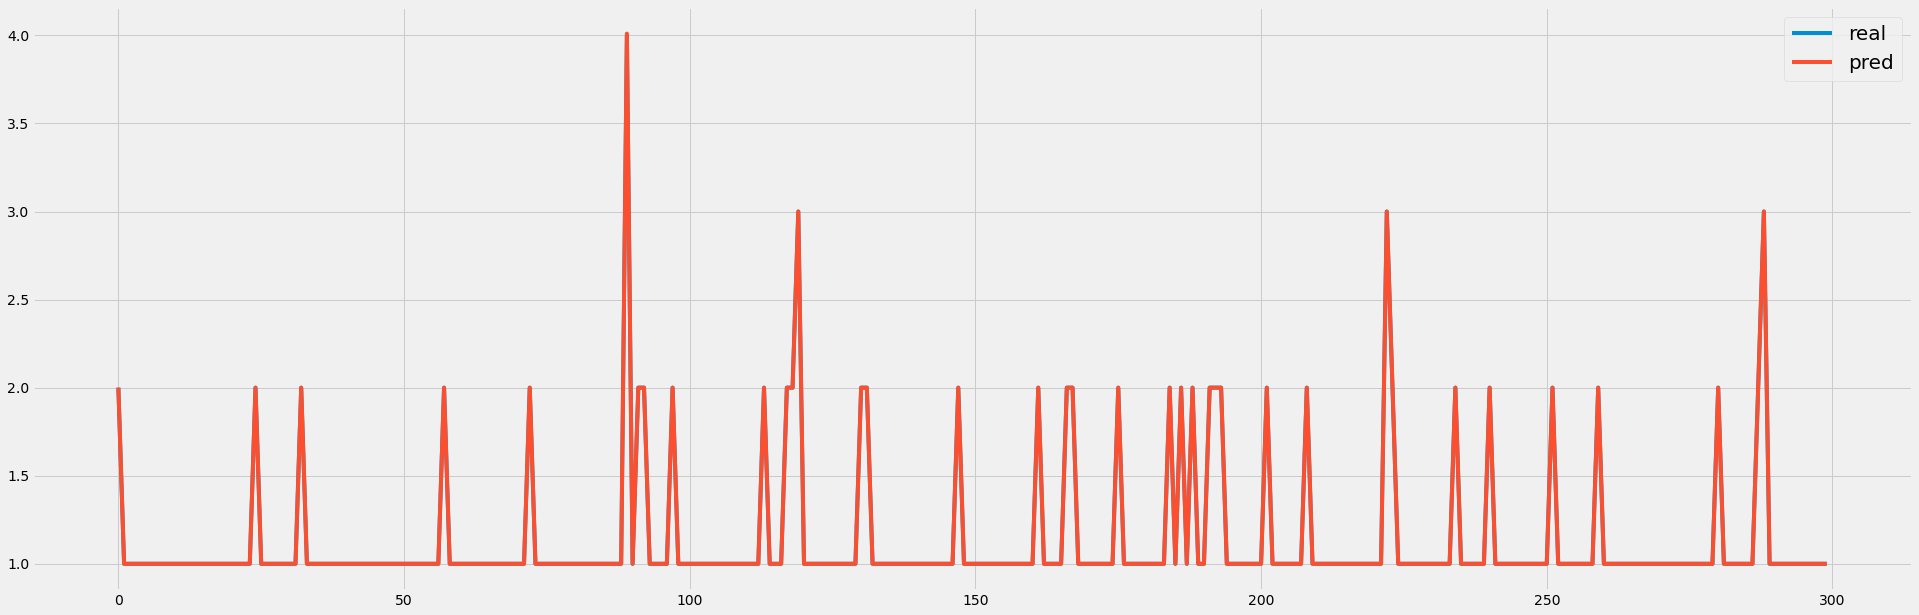

CV 정확도 점수: [0.99963287 0.99970431 0.9992822  0.99933166 0.9991662  0.99994814
 0.99956024 0.99941357 0.99982396 0.99993158]
CV 정확도: 1.000 +/- 0.000


In [ ]:
X_train, X_test, y_train, y_test = data_split(group_data, feature_names)
forest_fit()

지역별

In [ ]:
col = ['사고내용','발생월','발생일자','요일','발생시간', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수','부상자수']
loc_data2 = new_data2.groupby(['법정동명', '발생지_시군구','발생년도']).mean()[col] #지역별 평균 df
loc_data2['사고건수'] = new_data2.groupby(['법정동명', '발생지_시군구','발생년도']).sum()['사고건수']
loc_data2 = loc_data2.reset_index(drop=False)
loc_data2

,법정동명,발생지_시군구,발생년도,사고내용,발생월,발생일자,요일,발생시간,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,부상자수
0,0,17,2010,1.291237,6.860825,15.484536,2.783505,11.989691,0.005155,0.469072,0.863402,0.061856,0.780928,9.551546,11.283505,5.948454,1.000000,0.574742,2.221649,1.265464,4.868557,7.216495,1.134021,44.698454,3.837629,7.791237,1.481959,42.487113,2.551546,388,1.399485
1,0,17,2011,0.991620,7.167598,16.648045,2.910615,12.488827,0.022346,0.337989,1.022346,0.064246,0.782123,8.871508,10.371508,5.969274,1.000000,0.477654,2.201117,1.444134,5.078212,7.337989,1.131285,45.047486,3.773743,7.756983,1.497207,40.703911,2.086592,358,1.446927
2,0,17,2012,0.964657,6.696466,15.746362,2.864865,12.072765,0.006237,0.338877,0.962578,0.087318,0.796258,7.675676,8.993763,5.981289,0.997921,0.430353,2.232848,1.598753,5.187110,7.363825,1.149688,43.898129,3.621622,7.985447,1.486486,44.024948,2.091476,481,1.395010
3,0,17,2013,1.278450,6.450363,15.830508,2.895884,12.658596,0.007264,0.476998,0.876513,0.121065,0.789346,7.314770,8.600484,6.208232,0.997579,0.513317,2.273608,1.668281,5.208232,7.409201,1.104116,44.588378,3.622276,7.903148,1.474576,43.878935,2.569007,413,1.481840
4,0,17,2014,1.135279,6.729443,16.233422,2.801061,12.493369,0.002653,0.360743,0.835544,0.190981,0.785146,7.151194,8.413793,6.005305,1.000000,0.503979,1.981432,1.493369,4.909814,7.339523,1.143236,43.946950,3.403183,7.724138,1.533156,44.344828,2.435013,377,1.389920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,468,23,2014,1.064516,7.709677,17.258065,2.645161,11.032258,0.000000,0.354839,0.838710,0.225806,0.709677,8.290323,9.774194,5.806452,1.000000,0.387097,2.419355,1.451613,4.870968,7.290323,1.032258,47.483871,3.516129,7.193548,1.419355,39.064516,2.612903,31,1.419355
4171,468,23,2015,1.225806,7.096774,18.838710,2.322581,13.064516,0.000000,0.451613,0.903226,0.064516,0.838710,9.645161,11.451613,6.290323,1.000000,0.258065,2.225806,1.838710,5.258065,7.806452,0.967742,41.935484,3.387097,8.967742,1.322581,42.387097,2.709677,31,1.419355
4172,468,23,2016,1.000000,4.684211,15.947368,3.157895,11.315789,0.000000,0.263158,0.631579,0.263158,0.789474,9.210526,11.315789,5.947368,1.000000,0.210526,2.526316,2.052632,6.157895,6.842105,1.052632,35.842105,3.421053,7.421053,1.105263,47.631579,2.526316,19,1.157895
4173,468,23,2017,1.518519,6.296296,18.481481,3.074074,13.333333,0.000000,0.481481,0.592593,0.074074,0.666667,10.814815,13.518519,5.777778,1.000000,0.148148,2.037037,1.666667,5.222222,6.444444,1.000000,48.962963,3.777778,7.629630,1.444444,45.703704,3.333333,27,1.148148


훈련 MSE: 865.884, 테스트 MSE: 5807.455
훈련 R^2: 0.951, 테스트 R^2: 0.636


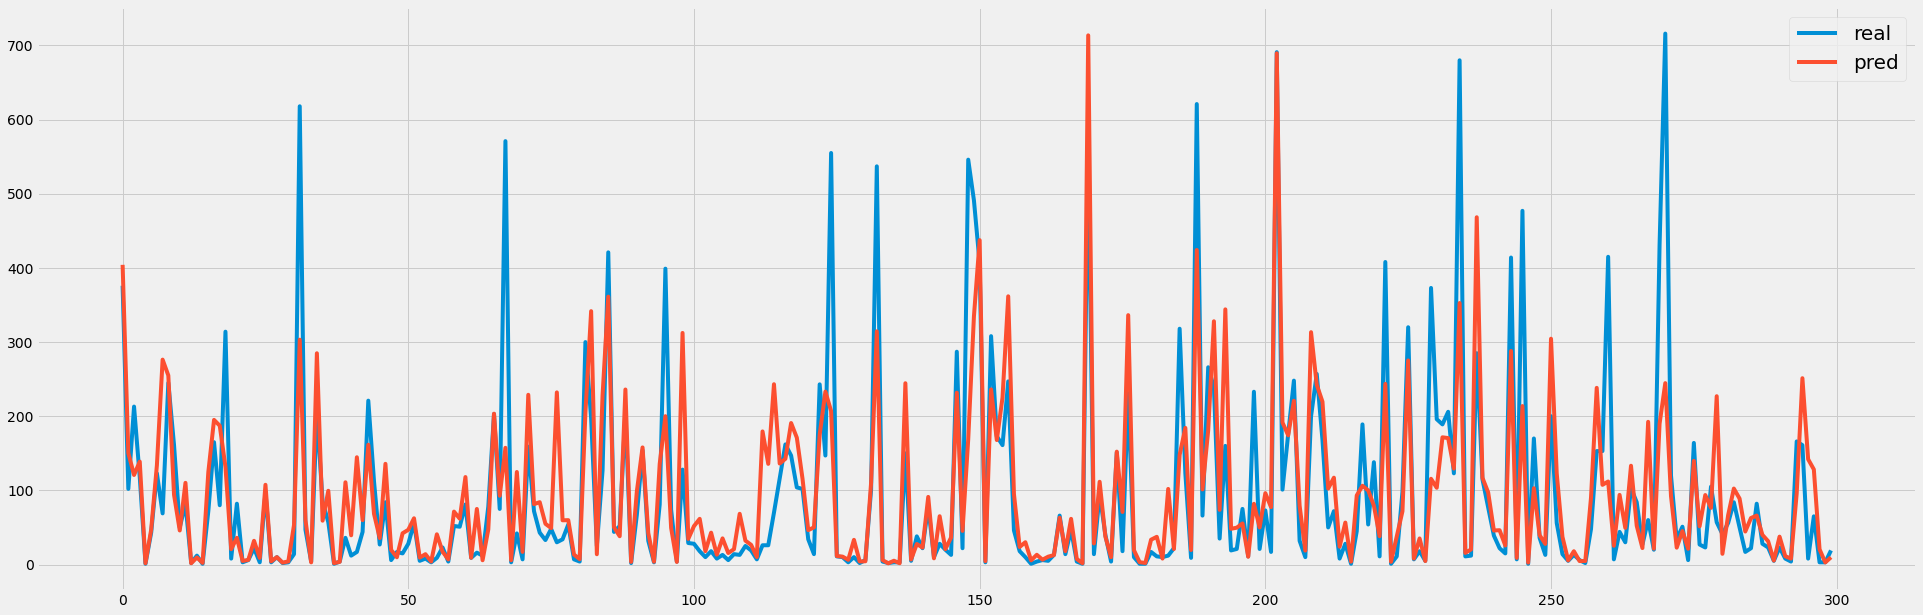

CV 정확도 점수: [ 0.63214737  0.62771775  0.68162792  0.64886807  0.63865969  0.66093981
 -0.22554985  0.60256288  0.53321583  0.49369867]
CV 정확도: 0.529 +/- 0.258


In [ ]:
X_train, X_test, y_train, y_test = data_split(loc_data2, feature_names)
forest_fit()

**최종모델**

In [ ]:
col = ['사고내용','발생월','발생일자','요일','발생시간', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수','부상자수']
loc_data = new_data2.groupby(['법정동명', '발생지_시군구','발생년도']).sum()[col] #지역별 sum df
loc_data = loc_data.reset_index(drop=False)
loc_data

,법정동명,발생지_시군구,발생년도,사고내용,발생월,발생일자,요일,발생시간,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,부상자수
0,0,17,2010,501,2662,6008,1080,4652,2,182,335,24,303,3706,4378,2308,388,223,862,491,1889,2800,440,17343,1489,3023,575,16485,990,388,543
1,0,17,2011,355,2566,5960,1042,4471,8,121,366,23,280,3176,3713,2137,358,171,788,517,1818,2627,405,16127,1351,2777,536,14572,747,358,518
2,0,17,2012,464,3221,7574,1378,5807,3,163,463,42,383,3692,4326,2877,480,207,1074,769,2495,3542,553,21115,1742,3841,715,21176,1006,481,671
3,0,17,2013,528,2664,6538,1196,5228,3,197,362,50,326,3021,3552,2564,412,212,939,689,2151,3060,456,18415,1496,3264,609,18122,1061,413,612
4,0,17,2014,428,2537,6120,1056,4710,1,136,315,72,296,2696,3172,2264,377,190,747,563,1851,2767,431,16568,1283,2912,578,16718,918,377,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,468,23,2014,33,239,535,82,342,0,11,26,7,22,257,303,180,31,12,75,45,151,226,32,1472,109,223,44,1211,81,31,44
4171,468,23,2015,38,220,584,72,405,0,14,28,2,26,299,355,195,31,8,69,57,163,242,30,1300,105,278,41,1314,84,31,44
4172,468,23,2016,19,89,303,60,215,0,5,12,5,15,175,215,113,19,4,48,39,117,130,20,681,65,141,21,905,48,19,22
4173,468,23,2017,41,170,499,83,360,0,13,16,2,18,292,365,156,27,4,55,45,141,174,27,1322,102,206,39,1234,90,27,31


훈련 MSE: 0.334, 테스트 MSE: 0.935
훈련 R^2: 1.000, 테스트 R^2: 1.000


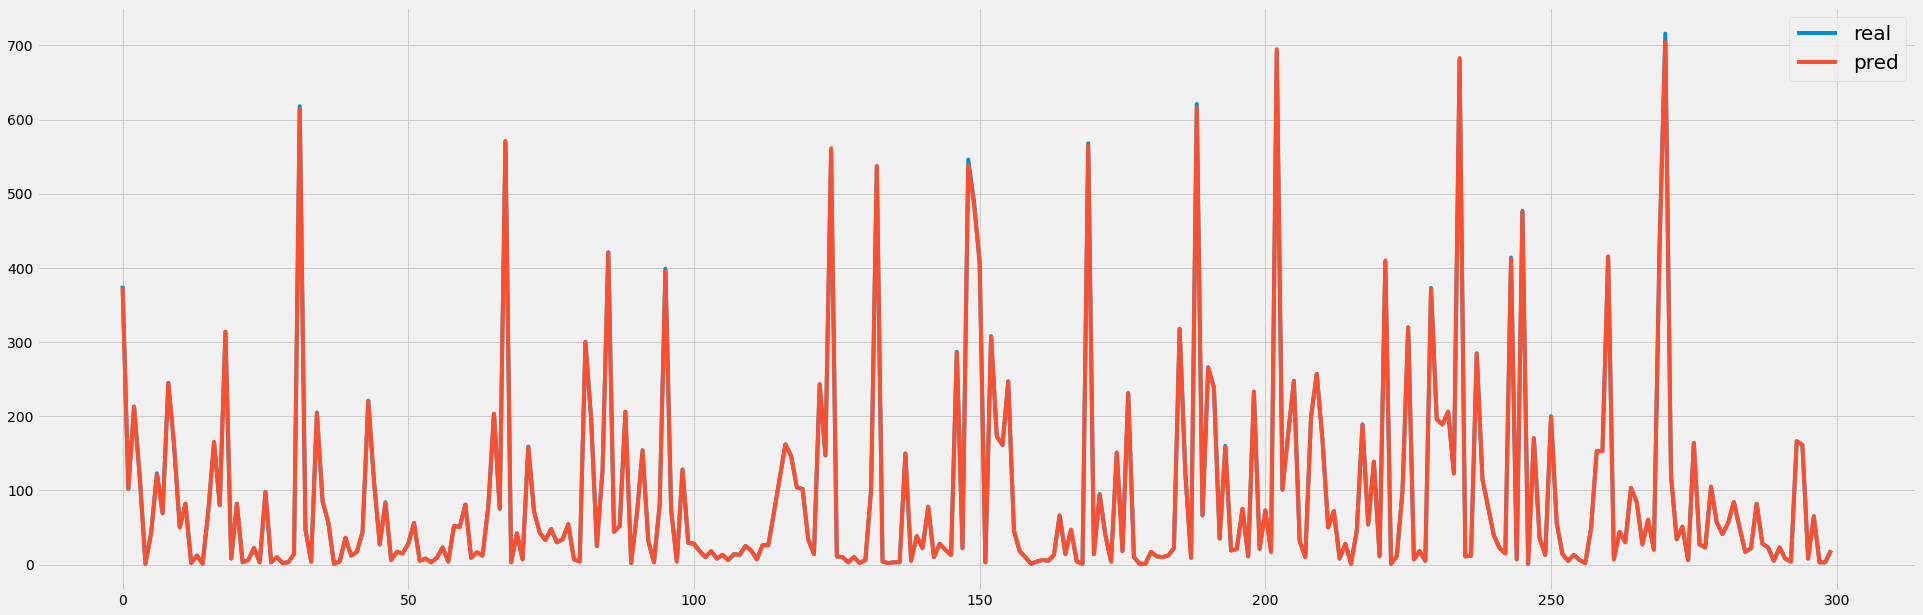

CV 정확도 점수: [0.99997296 0.99988868 0.99994023 0.99988073 0.99994119 0.99177017
 0.99996592 0.99995127 0.99996199 0.99983111]
CV 정확도: 0.999 +/- 0.002


In [ ]:
X_train, X_test, y_train, y_test = data_split(loc_data, feature_names)
forest_fit()